In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cleaned dataset
path = r'C:\Users\Tesla Laptops\Desktop\Job planning\Portfolio Project\TNO - Crimes in London\data\raw\M1045_MonthlyCrimeDashboard_TNOCrimeData_cleaned.csv'

In [3]:
df = pd.read_csv(path, parse_dates=['Month_Year', 'Refresh Date'])

In [4]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791224 entries, 0 to 791223
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Month_Year        791224 non-null  datetime64[ns]
 1   Area Type         791224 non-null  object        
 2   Borough_SNT       791224 non-null  object        
 3   Area name         791224 non-null  object        
 4   Area code         788005 non-null  object        
 5   Offence Group     791224 non-null  object        
 6   Offence Subgroup  791224 non-null  object        
 7   Measure           791224 non-null  object        
 8   Financial Year    791224 non-null  object        
 9   FY_FYIndex        791224 non-null  object        
 10  Count             791224 non-null  int64         
 11  Refresh Date      791224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 72.4+ MB


In [6]:
df.columns

Index(['Month_Year', 'Area Type', 'Borough_SNT', 'Area name', 'Area code',
       'Offence Group', 'Offence Subgroup', 'Measure', 'Financial Year',
       'FY_FYIndex', 'Count', 'Refresh Date'],
      dtype='object')

In [9]:
df.dtypes

Month_Year          datetime64[ns]
Area Type                   object
Borough_SNT                 object
Area name                   object
Area code                   object
Offence Group               object
Offence Subgroup            object
Measure                     object
Financial Year              object
FY_FYIndex                  object
Count                        int64
Refresh Date        datetime64[ns]
dtype: object

In [10]:
# Extracting Day, Month and Year from Month_Year Column
df['Year'] = df['Month_Year'].dt.year
df['Month'] = df['Month_Year'].dt.month
df['day'] = df['Month_Year'].dt.day

df['month_name'] = df['Month_Year'].dt.strftime('%b') # e.g., "Jun"
df['month_year_label'] = df['Month_Year'].dt.strftime('%b %Y') # e.g., "Jun 2021"

In [16]:
df.head()

,Month_Year,Area Type,Borough_SNT,Area name,Area code,Offence Group,Offence Subgroup,Measure,Financial Year,FY_FYIndex,Count,Refresh Date,Year,Month,day,month_name,month_year_label
0,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - BUSINESS AND COMMUNITY,Positive Outcomes,fy21-22,21-22_01,1,2025-06-05,2021,6,1,Jun,Jun 2021
1,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,BURGLARY,BURGLARY - RESIDENTIAL,Positive Outcomes,fy21-22,21-22_01,2,2025-06-05,2021,6,1,Jun,Jun 2021
2,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,ARSON AND CRIMINAL DAMAGE,CRIMINAL DAMAGE,Positive Outcomes,fy21-22,21-22_01,13,2025-06-05,2021,6,1,Jun,Jun 2021
3,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,DRUG OFFENCES,TRAFFICKING OF DRUGS,Positive Outcomes,fy21-22,21-22_01,5,2025-06-05,2021,6,1,Jun,Jun 2021
4,2021-06-01,Borough,Barking and Dagenham,Barking and Dagenham,E09000002,PUBLIC ORDER OFFENCES,OTHER OFFENCES PUBLIC ORDER,Offences,fy21-22,21-22_01,14,2025-06-05,2021,6,1,Jun,Jun 2021


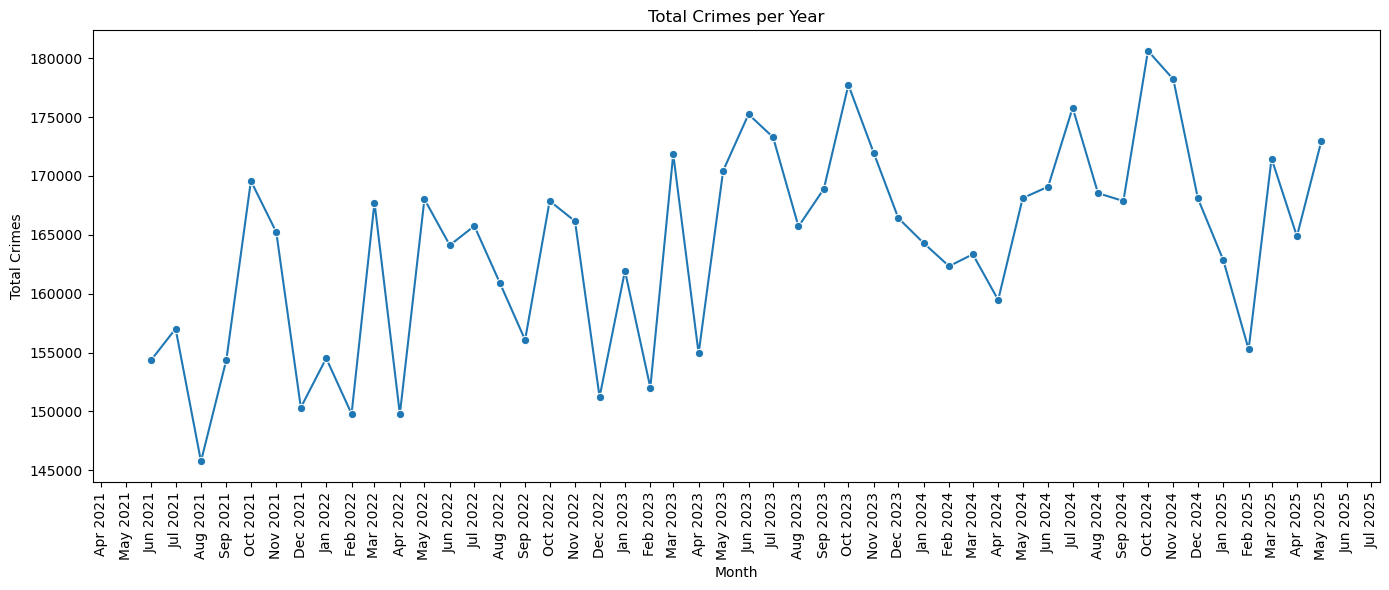

In [17]:
# Count of offences per year

import matplotlib.dates as mdates

monthly = df.groupby('Month_Year')['Count'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly, x='Month_Year', y='Count', marker='o')
plt.title("Total Crimes per Year")
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.xticks(rotation=90)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

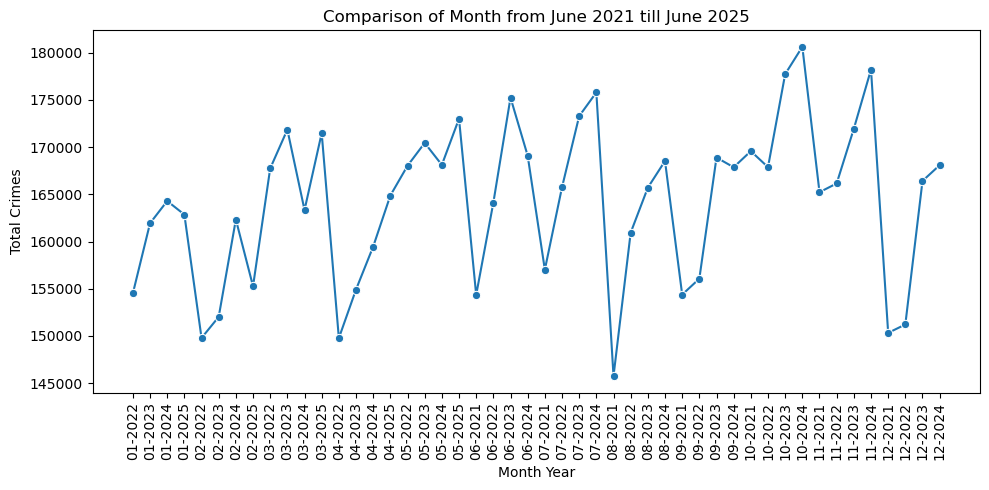

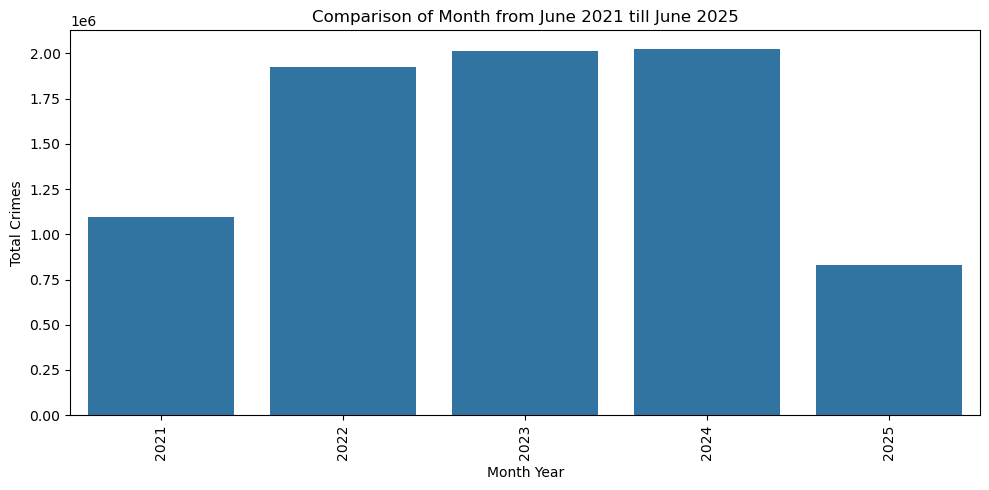

In [57]:
df['year_label'] = df['Month_Year'].dt.strftime('%Y')
Total_crimes_per_year = df.groupby('year_label')['Count'].sum().reset_index()

# monthly_by_label

plt.figure(figsize = (10, 5))
sns.barplot(data=Total_crimes_per_year, x='year_label', y='Count')
plt.title('Comparison of Month from June 2021 till June 2025')
plt.xlabel('Month Year')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

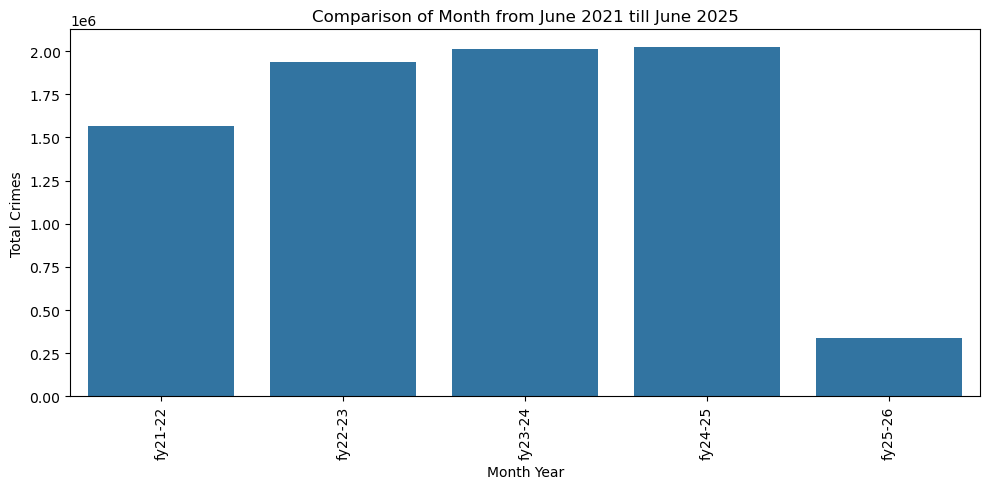

In [59]:
# df['year_label'] = df['Month_Year'].dt.strftime('%Y')
Total_crimes_per_year = df.groupby('Financial Year')['Count'].sum().reset_index()

# monthly_by_label

plt.figure(figsize = (10, 5))
sns.barplot(data=Total_crimes_per_year, x='Financial Ya', y='Count')
plt.title('Comparison of Month from June 2021 till June 2025')
plt.xlabel('Month Year')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

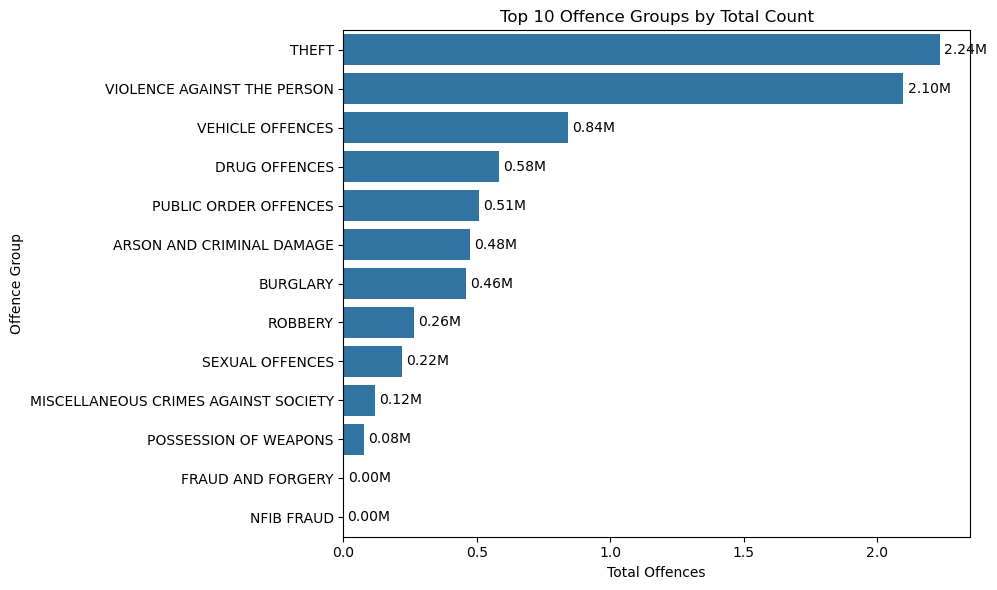

In [108]:
top_offences = df.groupby('Offence Group')['Count'].sum().sort_values(ascending=False).reset_index()

# Convert Count to Millions
top_offences['Count_M'] = top_offences['Count'] / 1000000

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=top_offences, x='Count_M', y='Offence Group')

# Add values on top of each bar
for bar in barplot.containers:
    barplot.bar_label(bar, fmt='%0.2fM', label_type='edge', padding=3)
    
plt.title('Top 10 Offence Groups by Total Count')
plt.xlabel('Total Offences')
plt.ylabel('Offence Group')
plt.tight_layout()
plt.show()


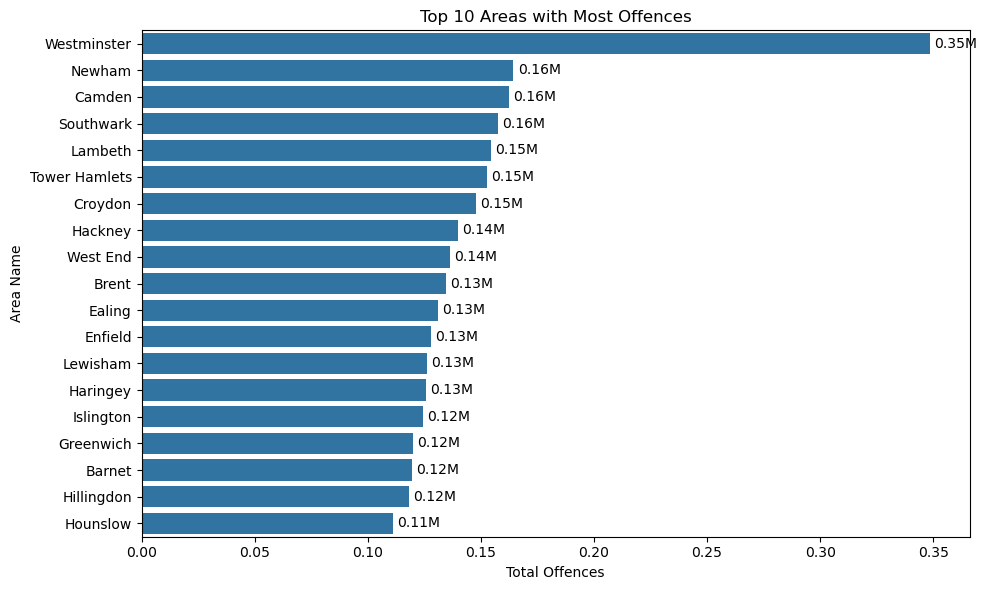

In [158]:
top_areas = (df.groupby('Area name')['Count'].sum().sort_values(ascending=False).iloc[1:20].reset_index())



top_areas['Count_M'] = top_areas['Count']/1000000

plt.figure(figsize=(10,6))
barplot = sns.barplot(data=top_areas, x='Count_M', y='Area name')


for bar in barplot.containers:
    barplot.bar_label(bar, fmt='%0.2fM', label_type='edge', padding=3)
    

plt.title('Top 10 Areas with Most Offences')
plt.xlabel('Total Offences')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()


In [73]:
(pivot > 0).sum().sum()

df[['Area name', 'Offence Group', 'Count']].head(10)

,Area name,Offence Group,Count
0,Barking and Dagenham,BURGLARY,1
1,Barking and Dagenham,BURGLARY,2
2,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,13
3,Barking and Dagenham,DRUG OFFENCES,5
4,Barking and Dagenham,PUBLIC ORDER OFFENCES,14
5,Barking and Dagenham,MISCELLANEOUS CRIMES AGAINST SOCIETY,17
6,Barking and Dagenham,BURGLARY,24
7,Barking and Dagenham,PUBLIC ORDER OFFENCES,5
8,Barking and Dagenham,POSSESSION OF WEAPONS,14
9,Barking and Dagenham,ARSON AND CRIMINAL DAMAGE,5


In [114]:
top_areas

Index(['Other / NK', 'Westminster', 'Newham', 'Camden', 'Southwark', 'Lambeth',
       'Tower Hamlets', 'Croydon', 'Hackney', 'West End'],
      dtype='object', name='Area name')

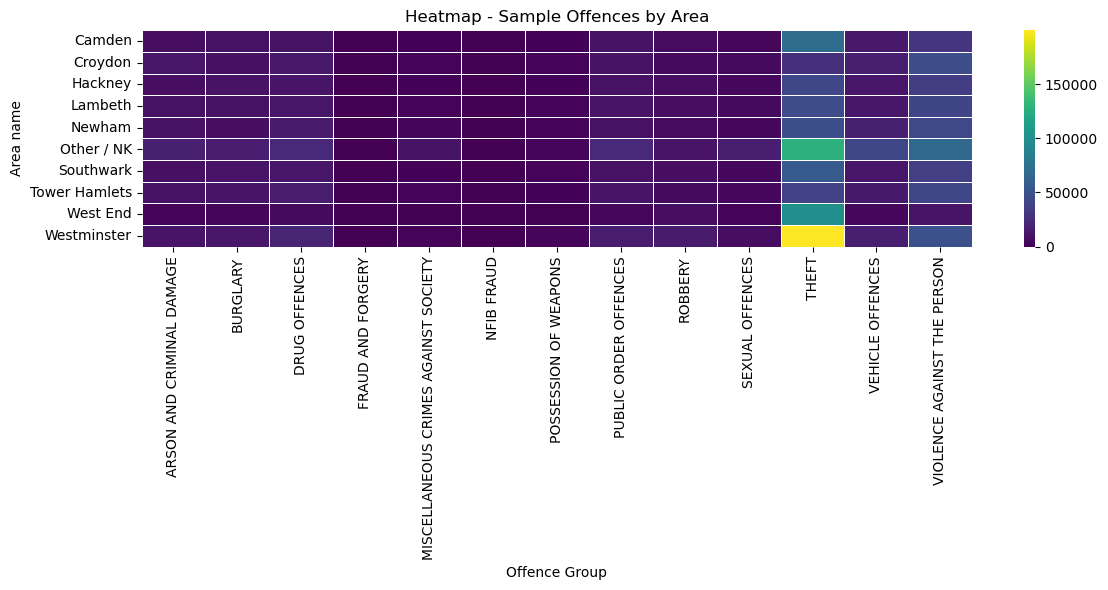

In [166]:
top_areas = df.groupby('Area name')['Count'].sum().sort_values(ascending=False).head(10).index
sample_df = df[df['Area name'].isin(top_areas)]

pivot_sample = sample_df.pivot_table(index='Area name', columns='Offence Group', values='Count', aggfunc='sum').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_sample, cmap='viridis', linewidths=0.5)
plt.title('Heatmap - Sample Offences by Area')
plt.tight_layout()
plt.show()


# Something wrong in this graph

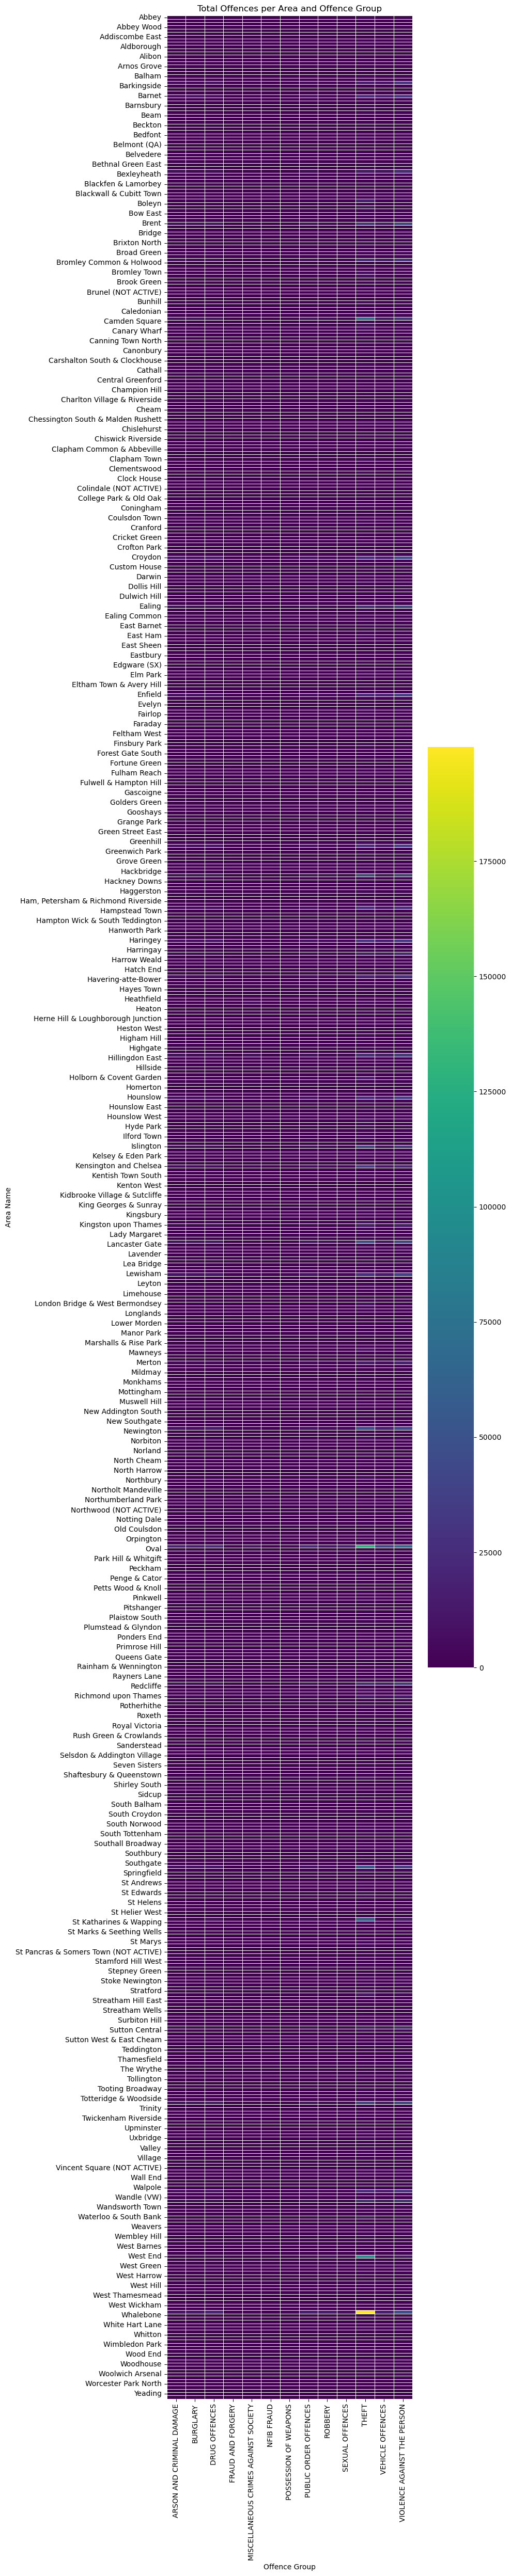

In [172]:
pivot = df.pivot_table(index='Area name', columns='Offence Group', values='Count', aggfunc='sum').fillna(0)
sample_df = df[df['Area name'].isin(top_areas)]

plt.figure(figsize=(10,50))
sns.heatmap(pivot, cmap='viridis', linewidths=0.5)
plt.title('Total Offences per Area and Offence Group')
plt.xlabel('Offence Group')
plt.ylabel('Area Name')
plt.tight_layout()
plt.show()


# separator

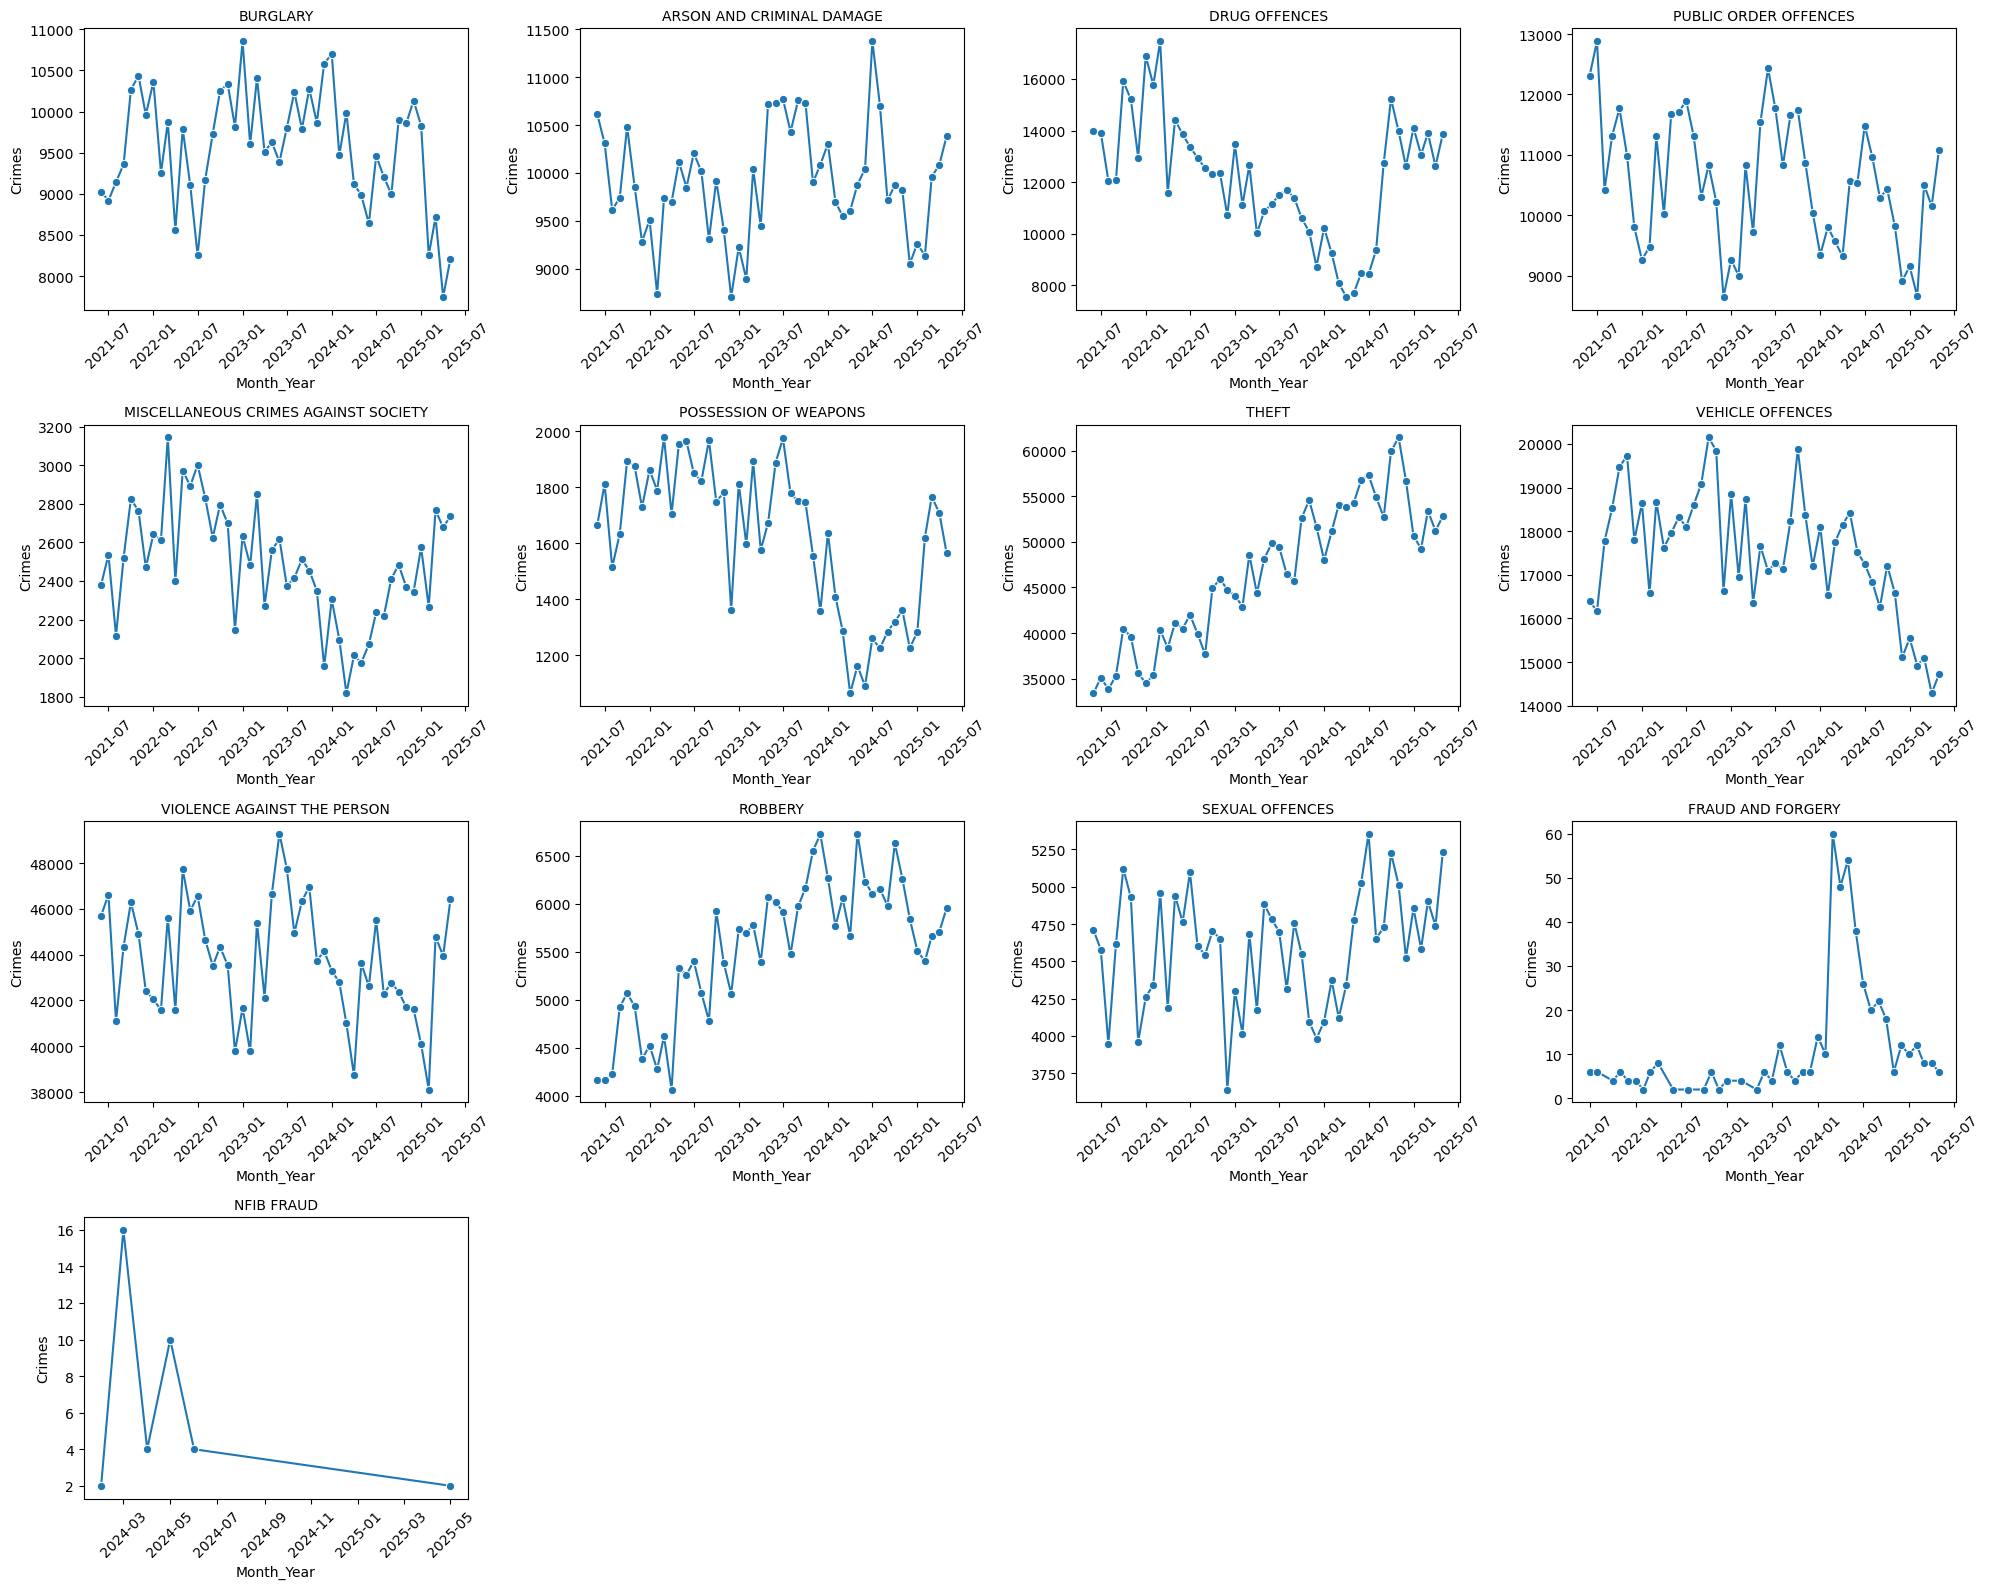

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Step 1: Get all offence groups
offence_groups = df['Offence Group'].unique()
n = len(offence_groups)

# Step 2: Grid size - 4 columns
cols = 4
rows = math.ceil(n / cols)

# Step 3: Create grid of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 4 * rows), sharex=False)
axes = axes.flatten()  # Make 1D for easy indexing

# Step 4: Loop and plot
for i, group in enumerate(offence_groups):
    subset = df[df['Offence Group'] == group]
    monthly = subset.groupby('Month_Year')['Count'].sum().reset_index()

    sns.lineplot(ax=axes[i], data=monthly, x='Month_Year', y='Count', marker='o')
    axes[i].set_title(f'{group}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Crimes')

# Step 5: Remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
